# DESCARTES UNDERWRITING TECHNICAL TEST - Paul COUTURIER

In [163]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', None)

In [164]:
#Loading datasets
df_test = pd.read_csv("test_auto.csv", index_col = "INDEX")
df_train = pd.read_csv("train_auto.csv", index_col = "INDEX")

# I. EDA of the dataset

## 1. Variables

In [165]:
df_train.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [166]:
df_train.describe(include = "all")

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
count,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,7716,8161,7697,8161,8161,8161,7635,8161.000000,8161,8161,8161.000000,8161,8161,8161,8161.000000,8161,8161.000000,7651.000000,8161
unique,NaN,NaN,NaN,NaN,NaN,NaN,6612,2,5106,2,2,5,8,NaN,2,2789,NaN,6,2,2857,NaN,2,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,$0,No,$0,Yes,z_F,z_High School,z_Blue Collar,NaN,Private,"$1,500",NaN,z_SUV,no,$0,NaN,No,NaN,NaN,Highly Urban/ Urban
freq,NaN,NaN,NaN,NaN,NaN,NaN,615,7084,2294,4894,4375,2330,1825,NaN,5132,157,NaN,2294,5783,5009,NaN,7161,NaN,NaN,6492
mean,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.485725,NaN,NaN,5.351305,NaN,NaN,NaN,0.798554,NaN,1.695503,8.328323,NaN
std,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.908333,NaN,NaN,4.146635,NaN,NaN,NaN,1.158453,NaN,2.147112,5.700742,NaN
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,-3.000000,NaN
25%,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN
50%,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,8.000000,NaN
75%,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,7.000000,NaN,NaN,NaN,2.000000,NaN,3.000000,12.000000,NaN


#### Outliers

Thanks to this first summary we obtain the range of all the features. As we can see, in the feature "CAR_AGE" we have at least one outlier, as the minimum is -3, which is incoherent with an age. We should remove all the possible problematic data with CAR_AGE < 0 . 

#### Output rate
We see that we only have 26% of the output flag that is 1. This means that we may have trouble predicting this output, as we will have less examples to train. However, the output 1, as it represents a claim from a user, may be the one that we wish to predict as accurately as possible as it will represent the effective cost for the company.

In [167]:
df_train[df_train["CAR_AGE"] < 0]

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
8772,1,1469.0,0,47.0,0,12.0,"$48,696",No,"$212,014",z_No,z_F,Bachelors,Professional,46,Private,"$15,390",4,Pickup,no,"$33,521",3,Yes,1,-3.0,Highly Urban/ Urban


In [168]:
df_train = df_train[(df_train["CAR_AGE"] >= 0) | (df_train["CAR_AGE"].isnull())]

In [152]:
#df_train.describe(include = "all")


In [169]:
df_test.describe(include = "all")


,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
count,0.0,0.0,2141.000000,2140.000000,2141.000000,2047.000000,2016,2141,2030,2141,2141,2141,2002,2141.000000,2141,2141,2141.000000,2141,2141,2141,2141.000000,2141,2141.000000,2012.000000,2141
unique,NaN,NaN,NaN,NaN,NaN,NaN,1803,2,1397,2,2,5,8,NaN,2,1417,NaN,6,2,834,NaN,2,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,$0,No,$0,Yes,z_F,z_High School,z_Blue Collar,NaN,Private,"$1,500",NaN,z_SUV,no,$0,NaN,No,NaN,NaN,Highly Urban/ Urban
freq,NaN,NaN,NaN,NaN,NaN,NaN,182,1875,614,1294,1170,622,463,NaN,1381,50,NaN,589,1543,1283,NaN,1880,NaN,NaN,1738
mean,NaN,NaN,0.162541,45.016822,0.717422,10.379091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.152265,NaN,NaN,5.244745,NaN,NaN,NaN,0.808968,NaN,1.765997,8.183400,NaN
std,NaN,NaN,0.486949,8.525006,1.116579,4.170008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.722393,NaN,NaN,3.971026,NaN,NaN,NaN,1.137481,NaN,2.203413,5.766263,NaN
min,NaN,NaN,0.000000,17.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,39.000000,0.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN
50%,NaN,NaN,0.000000,45.000000,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,8.000000,NaN
75%,NaN,NaN,0.000000,51.000000,1.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,NaN,NaN,7.000000,NaN,NaN,NaN,2.000000,NaN,3.000000,12.000000,NaN


#### Quick description
Understanding of variables can be interesting.


Target variable : 
- Target_Flag : Real output, which is binary. It says if the user has made a claim
- Target_AMT : (not taken into account), it is the amount of the compensation

Covariates : 
- KIDSDRIV : Maybe Kids who can drive in the family, ordinal variable
- AGE : age of the user, continuous variable
- HOMEKIDS : ordinal variable, kids who are depend on their parents
- YOJ : Year of Job 
- INCOME : continuous variable
- PARENT1 : Only one parent home
- HOME_VAL : Value of their house - continuous
- MSTATUS : marrital status - binary
- SEX : binary
- EDUCATION : ordinal variable
- JOB : categorical variable
- TRAVTIME : meaning travel time per day - ordinal variable
- CAR_USE : binary
- BLUEBOOK : price of their car : The Blue Book or Kelley Blue Book is a guidebook that compiles and quotes prices for new and used cars.
- TIF : Time in force, how long the user has been a customer - continuous variable
- CAR_TYPE : categorical 
- RED_CAR : binary
- OLDCLAIM : old claim made by the user
- CLM_FREQ : number of claim before
- REVOKED : has their driving licence been revoked
- MVR_PTS : motor vehicule records points. Diving licence points of the user
- CAR_AGE : continuous
- URBANICITY : area where they drive 

#### Goal
We have got a binary classification problem, concerning the variable Target flag. From the 23 covariates that we have, we could assume some may be positively or negatively correlated. Moreover, some may not be useful or relevant at all. 

Given the number of covariables - 23 - and the number of data  - 8161 - conventional machine learning or statistical techniques should be adapted, whereas deep learning may not have enough data to be efficient. 

We will first transform the covariates simply in order to be able to analyse the data. 
Then, we will focus on selecting and creating new features, using our previous analysis. We will also handle missing values. Finally we will apply and recursively improve diverse algorithms to try to predict our output.  

## 2. Transforming covariates for analysis

In [170]:
# Tranforming variable for EDA

df_train_trans = df_train.copy()

# Same for test
df_test_trans = df_test.copy()


In [171]:

# Treating multiple categories case
df_train_trans = pd.get_dummies(data=df_train_trans, columns=['JOB','CAR_TYPE'])

# Treating binary non float case

df_train_trans['PARENT1'].replace(['Yes','No'],[0,1],inplace = True)
df_train_trans['MSTATUS'].replace(['Yes','z_No'],[0,1],inplace=True)
df_train_trans['SEX'].replace(['M','z_F'],[0,1],inplace=True)
df_train_trans['CAR_USE'].replace(['Private','Commercial'],[0,1],inplace=True)
df_train_trans['REVOKED'].replace(['Yes','No'],[0,1],inplace=True)
df_train_trans['URBANICITY'].replace(['Highly Urban/ Urban','z_Highly Rural/ Rural'],[0,1],inplace=True)
df_train_trans['RED_CAR'].replace(['yes','no'],[0,1],inplace=True)


# Same for test

# Treating multiple categories case
df_test_trans = pd.get_dummies(data=df_test_trans, columns=['JOB','CAR_TYPE'])

# Treating binary non float case
df_test_trans['PARENT1'].replace(['Yes','No'],[0,1],inplace = True)
df_test_trans['MSTATUS'].replace(['Yes','z_No'],[0,1],inplace=True)
df_test_trans['SEX'].replace(['M','z_F'],[0,1],inplace=True)
df_test_trans['CAR_USE'].replace(['Private','Commercial'],[0,1],inplace=True)
df_test_trans['REVOKED'].replace(['Yes','No'],[0,1],inplace=True)
df_test_trans['URBANICITY'].replace(['Highly Urban/ Urban','z_Highly Rural/ Rural'],[0,1],inplace=True)
df_test_trans['RED_CAR'].replace(['yes','no'],[0,1],inplace=True)


In [172]:
df_train_trans

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,"$67,349",1,$0,1,0,PhD,14,0,"$14,230",11,0,"$4,461",2,1,3,18.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0.0,0,43.0,0,11.0,"$91,449",1,"$257,252",1,0,z_High School,22,1,"$14,940",1,0,$0,0,1,0,1.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0.0,0,35.0,1,10.0,"$16,039",1,"$124,191",0,1,z_High School,5,0,"$4,010",4,1,"$38,690",2,1,3,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0.0,0,51.0,0,14.0,NaN,1,"$306,251",0,0,<High School,32,0,"$15,440",7,0,$0,0,1,0,6.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
6,0,0.0,0,50.0,0,NaN,"$114,986",1,"$243,925",0,1,PhD,36,0,"$18,000",1,1,"$19,217",2,0,3,17.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0.0,0,35.0,0,11.0,"$43,112",1,$0,1,0,z_High School,51,1,"$27,330",10,0,$0,0,1,0,8.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10298,0,0.0,1,45.0,2,9.0,"$164,669",1,"$386,273",0,0,PhD,21,0,"$13,270",15,1,$0,0,1,2,17.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
10299,0,0.0,0,46.0,0,9.0,"$107,204",1,"$332,591",0,0,Masters,36,1,"$24,490",6,1,$0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [173]:
# Treating eduction case where could be ordered by level of education. 
np.unique(df_train_trans["EDUCATION"])



array(['<High School', 'Bachelors', 'Masters', 'PhD', 'z_High School'],
      dtype=object)

In [174]:
df_train_trans.loc[df_train_trans["EDUCATION"]=='<High School',"EDUCATION"] = 0
df_train_trans.loc[df_train_trans["EDUCATION"]=='z_High School',"EDUCATION"] = 1
df_train_trans.loc[df_train_trans["EDUCATION"]=='Bachelors',"EDUCATION"] = 2
df_train_trans.loc[df_train_trans["EDUCATION"]=='Masters',"EDUCATION"] = 3
df_train_trans.loc[df_train_trans["EDUCATION"]=='PhD',"EDUCATION"] = 4


#Same for test 

df_test_trans.loc[df_test_trans["EDUCATION"]=='<High School',"EDUCATION"] = 0
df_test_trans.loc[df_test_trans["EDUCATION"]=='z_High School',"EDUCATION"] = 1
df_test_trans.loc[df_test_trans["EDUCATION"]=='Bachelors',"EDUCATION"] = 2
df_test_trans.loc[df_test_trans["EDUCATION"]=='Masters',"EDUCATION"] = 3
df_test_trans.loc[df_test_trans["EDUCATION"]=='PhD',"EDUCATION"] = 4


In [175]:
df_train_trans

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,"$67,349",1,$0,1,0,4,14,0,"$14,230",11,0,"$4,461",2,1,3,18.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0.0,0,43.0,0,11.0,"$91,449",1,"$257,252",1,0,1,22,1,"$14,940",1,0,$0,0,1,0,1.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0.0,0,35.0,1,10.0,"$16,039",1,"$124,191",0,1,1,5,0,"$4,010",4,1,"$38,690",2,1,3,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0.0,0,51.0,0,14.0,NaN,1,"$306,251",0,0,0,32,0,"$15,440",7,0,$0,0,1,0,6.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
6,0,0.0,0,50.0,0,NaN,"$114,986",1,"$243,925",0,1,4,36,0,"$18,000",1,1,"$19,217",2,0,3,17.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0.0,0,35.0,0,11.0,"$43,112",1,$0,1,0,1,51,1,"$27,330",10,0,$0,0,1,0,8.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10298,0,0.0,1,45.0,2,9.0,"$164,669",1,"$386,273",0,0,4,21,0,"$13,270",15,1,$0,0,1,2,17.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
10299,0,0.0,0,46.0,0,9.0,"$107,204",1,"$332,591",0,0,3,36,1,"$24,490",6,1,$0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [176]:
# Tranforming string into numbers

#INCOME
df_train_trans["INCOME"] = df_train_trans["INCOME"].str.replace('$', '')
df_train_trans["INCOME"] = df_train_trans["INCOME"].str.replace(',', '')
df_train_trans["INCOME"] = df_train_trans["INCOME"].astype(float)

#HOME_VAL
df_train_trans["HOME_VAL"] = df_train_trans["HOME_VAL"].str.replace('$', '')
df_train_trans["HOME_VAL"] = df_train_trans["HOME_VAL"].str.replace(',', '')
df_train_trans["HOME_VAL"] = df_train_trans["HOME_VAL"].astype(float)

#BLUEBOOK
df_train_trans["BLUEBOOK"] = df_train_trans["BLUEBOOK"].str.replace('$', '')
df_train_trans["BLUEBOOK"] = df_train_trans["BLUEBOOK"].str.replace(',', '')
df_train_trans["BLUEBOOK"] = df_train_trans["BLUEBOOK"].astype(float)

#OLDCLAIM
df_train_trans["OLDCLAIM"] = df_train_trans["OLDCLAIM"].str.replace('$', '')
df_train_trans["OLDCLAIM"] = df_train_trans["OLDCLAIM"].str.replace(',', '')
df_train_trans["OLDCLAIM"] = df_train_trans["OLDCLAIM"].astype(float)


# Same for test 

#INCOME
df_test_trans["INCOME"] = df_test_trans["INCOME"].str.replace('$', '')
df_test_trans["INCOME"] = df_test_trans["INCOME"].str.replace(',', '')
df_test_trans["INCOME"] = df_test_trans["INCOME"].astype(float)

#HOME_VAL
df_test_trans["HOME_VAL"] = df_test_trans["HOME_VAL"].str.replace('$', '')
df_test_trans["HOME_VAL"] = df_test_trans["HOME_VAL"].str.replace(',', '')
df_test_trans["HOME_VAL"] = df_test_trans["HOME_VAL"].astype(float)

#BLUEBOOK
df_test_trans["BLUEBOOK"] = df_test_trans["BLUEBOOK"].str.replace('$', '')
df_test_trans["BLUEBOOK"] = df_test_trans["BLUEBOOK"].str.replace(',', '')
df_test_trans["BLUEBOOK"] = df_test_trans["BLUEBOOK"].astype(float)

#OLDCLAIM
df_test_trans["OLDCLAIM"] = df_test_trans["OLDCLAIM"].str.replace('$', '')
df_test_trans["OLDCLAIM"] = df_test_trans["OLDCLAIM"].str.replace(',', '')
df_test_trans["OLDCLAIM"] = df_test_trans["OLDCLAIM"].astype(float)



<ipython-input-176-a11450fc486a>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_train_trans["INCOME"] = df_train_trans["INCOME"].str.replace('$', '')
<ipython-input-176-a11450fc486a>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_train_trans["HOME_VAL"] = df_train_trans["HOME_VAL"].str.replace('$', '')
<ipython-input-176-a11450fc486a>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_train_trans["BLUEBOOK"] = df_train_trans["BLUEBOOK"].str.replace('$', '')
<ipython-input-176-a11450fc486a>:19: FutureWarning: The

In [177]:
df_train_trans

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,67349.0,1,0.0,1,0,4,14,0,14230.0,11,0,4461.0,2,1,3,18.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0.0,0,43.0,0,11.0,91449.0,1,257252.0,1,0,1,22,1,14940.0,1,0,0.0,0,1,0,1.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0.0,0,35.0,1,10.0,16039.0,1,124191.0,0,1,1,5,0,4010.0,4,1,38690.0,2,1,3,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0.0,0,51.0,0,14.0,NaN,1,306251.0,0,0,0,32,0,15440.0,7,0,0.0,0,1,0,6.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
6,0,0.0,0,50.0,0,NaN,114986.0,1,243925.0,0,1,4,36,0,18000.0,1,1,19217.0,2,0,3,17.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0.0,0,35.0,0,11.0,43112.0,1,0.0,1,0,1,51,1,27330.0,10,0,0.0,0,1,0,8.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10298,0,0.0,1,45.0,2,9.0,164669.0,1,386273.0,0,0,4,21,0,13270.0,15,1,0.0,0,1,2,17.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
10299,0,0.0,0,46.0,0,9.0,107204.0,1,332591.0,0,0,3,36,1,24490.0,6,1,0.0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 3. Analysis of correlation

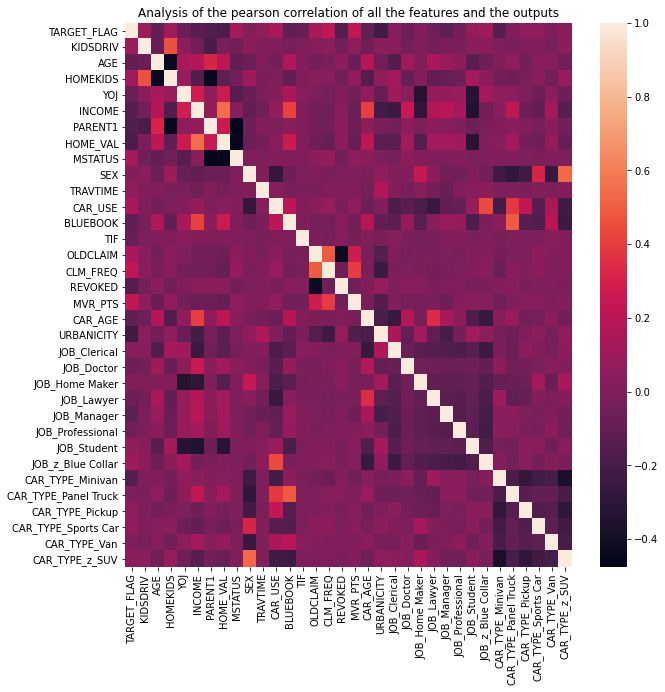

In [199]:
corr_df = df_train_trans.corr(method = "pearson")
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_df, annot=False,xticklabels=True, yticklabels=True)
plt.title("Analysis of the pearson correlation of all the features and the outputs")
plt.show()

We see that a part from the two outputs, that are logically strongly correlated (when a driver makes a claim, there should be a compensation), we don't see any clear correlations. Some feature transformation may be useful to improve this.

# II. Features selections and transformation

#### 1 Drop of features

Drop of the "RED_CAR" feature since it is based on a myth and doesn't bring any relevant information

Apart from this feature, since we didn't see any more important division to do in the correlation matrix, we can keep all the others features.
Notice here, that we are not taking into account any ethical or law-related approaches. Since nothing is defined in the instructions we want to obtain the best possible performance. However, in a real context, we may consider dropping the 'SEX' feature as it could be considered as discriminatory. 



In [179]:

#Drop "RED_CAR" (and also the other targetted variable that is not needed)
df_train_trans = df_train_trans.drop(columns = ["RED_CAR","TARGET_AMT"])

#Same for test 
df_test_trans = df_test_trans.drop(columns = ["RED_CAR","TARGET_AMT"])


#### 2. Handling missing values

From the summary study done before we know that there are 8161 rows and that the following variables lack some data : 
- AGE = 8155
- YOJ = 7707
- INCOME = 7716
- HOME_VAL = 7697
- JOB = 7635

Missing value at random or not ?
Here we will consider them "missing at random" (due to time lacking)

We will consider a mixing method between : listwise deletion and mean imputation when possible.



In [180]:
# Direct listwise deletion would result in losing one fourth of the dataset
df_train_trans.dropna(how = 'any',inplace = False)


,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,60.0,0,11.0,67349.0,1,0.0,1,0,4,14,0,14230.0,11,4461.0,2,1,3,18.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0,43.0,0,11.0,91449.0,1,257252.0,1,0,1,22,1,14940.0,1,0.0,0,1,0,1.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,35.0,1,10.0,16039.0,1,124191.0,0,1,1,5,0,4010.0,4,38690.0,2,1,3,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,0,34.0,1,12.0,125301.0,0,0.0,1,1,2,46,1,17430.0,1,0.0,0,1,0,7.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
12,1,0,34.0,0,10.0,62978.0,1,0.0,1,1,2,34,0,11200.0,1,0.0,0,1,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0,35.0,0,11.0,43112.0,1,0.0,1,0,1,51,1,27330.0,10,0.0,0,1,0,8.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10298,0,1,45.0,2,9.0,164669.0,1,386273.0,0,0,4,21,0,13270.0,15,0.0,0,1,2,17.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
10299,0,0,46.0,0,9.0,107204.0,1,332591.0,0,0,3,36,1,24490.0,6,0.0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [181]:
# Mean imputation
# Coherent for : INCOME, AGE, HOME_VAL

df_train_trans[["INCOME","AGE","HOME_VAL"]] = df_train_trans[["INCOME","AGE","HOME_VAL"]].fillna(df_train_trans[["INCOME","AGE","HOME_VAL"]].mean())


# Same for test 
df_test_trans[["INCOME","AGE","HOME_VAL","CAR_AGE","YOJ"]] = df_test_trans[["INCOME","AGE","HOME_VAL","CAR_AGE","YOJ"]].fillna(df_test_trans[["INCOME","AGE","HOME_VAL","CAR_AGE","YOJ"]].mean())

In [88]:
df_train_trans.describe()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,CAR_USE,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV
count,8160.000000,8160.000000,8160.000000,8160.000000,7706.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,7650.000000,8160.000000,8160.00000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000
mean,0.263725,0.171078,44.790042,0.721324,10.499092,61899.805833,0.868015,154859.864215,0.400245,0.536029,33.484191,0.371201,15709.938725,5.351471,4033.462990,0.798284,0.877574,1.695588,8.329804,0.204534,0.15576,0.030147,0.078554,0.102328,0.121078,0.136765,0.087255,0.223652,0.262868,0.082843,0.170098,0.111152,0.091912,0.281127
std,0.440679,0.511562,8.624911,1.116363,4.092704,46259.930329,0.338496,125404.969964,0.489978,0.498731,15.908705,0.483156,8420.249293,4.146862,8771.605028,1.158267,0.327798,2.147230,5.699643,0.403386,0.36265,0.171002,0.269058,0.303098,0.326238,0.343620,0.282226,0.416717,0.440218,0.275662,0.375742,0.314339,0.288919,0.449577
min,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,39.000000,0.000000,9.000000,29705.750000,1.000000,0.000000,0.000000,0.000000,22.000000,0.000000,9280.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,45.000000,0.000000,11.000000,57388.000000,1.000000,154859.864215,0.000000,1.000000,33.000000,0.000000,14440.000000,4.000000,0.000000,0.000000,1.000000,1.000000,8.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,13.000000,83307.000000,1.000000,233366.000000,1.000000,1.000000,44.000000,1.000000,20850.000000,7.000000,4633.750000,2.000000,1.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,4.000000,81.000000,5.000000,23.000000,367030.000000,1.000000,885282.000000,1.000000,1.000000,142.000000,1.000000,69740.000000,25.000000,57037.000000,5.000000,1.000000,13.000000,28.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
df_test_trans.describe()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,CAR_USE,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV
count,0.0,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.00000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000
mean,NaN,0.162541,45.016822,0.717422,10.379091,60324.265377,0.875759,153217.671429,0.395610,0.546474,33.152265,0.354974,15469.425502,5.244745,4022.167679,0.808968,0.878094,1.765997,8.183400,0.188230,0.148996,0.03503,0.094348,0.091546,0.125642,0.135918,0.087342,0.216254,0.256422,0.082672,0.178888,0.127043,0.079869,0.275105
std,NaN,0.486949,8.523014,1.116579,4.077395,45610.004746,0.329933,126054.757209,0.489095,0.497952,15.722393,0.478617,8462.367121,3.971026,8565.379145,1.137481,0.327253,2.203413,5.589766,0.390987,0.356168,0.18390,0.292381,0.288451,0.331523,0.342781,0.282402,0.411786,0.436760,0.275450,0.383348,0.333099,0.271154,0.446672
min,NaN,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,39.000000,0.000000,9.000000,27450.000000,1.000000,0.000000,0.000000,0.000000,22.000000,0.000000,8870.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,45.000000,0.000000,11.000000,55119.000000,1.000000,153217.671429,0.000000,1.000000,33.000000,0.000000,14170.000000,4.000000,0.000000,0.000000,1.000000,1.000000,8.183400,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,51.000000,1.000000,13.000000,82918.000000,1.000000,231739.000000,1.000000,1.000000,43.000000,1.000000,21050.000000,7.000000,4718.000000,2.000000,1.000000,3.000000,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,NaN,3.000000,73.000000,5.000000,19.000000,291182.000000,1.000000,669271.000000,1.000000,1.000000,105.000000,1.000000,49940.000000,25.000000,54399.000000,5.000000,1.000000,12.000000,26.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [183]:
# Using listwise deletion for the categorical data JOB and the variable YOJ
# Losing only a eighth of the dataset
df_train_trans = df_train_trans.dropna(how = 'any')
df_train_trans

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,60.0,0,11.0,67349.000000,1,0.0,1,0,4,14,0,14230.0,11,4461.0,2,1,3,18.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0,43.0,0,11.0,91449.000000,1,257252.0,1,0,1,22,1,14940.0,1,0.0,0,1,0,1.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,35.0,1,10.0,16039.000000,1,124191.0,0,1,1,5,0,4010.0,4,38690.0,2,1,3,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,51.0,0,14.0,61899.805833,1,306251.0,0,0,0,32,0,15440.0,7,0.0,0,1,0,6.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
7,1,0,34.0,1,12.0,125301.000000,0,0.0,1,1,2,46,1,17430.0,1,0.0,0,1,0,7.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0,35.0,0,11.0,43112.000000,1,0.0,1,0,1,51,1,27330.0,10,0.0,0,1,0,8.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10298,0,1,45.0,2,9.0,164669.000000,1,386273.0,0,0,4,21,0,13270.0,15,0.0,0,1,2,17.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
10299,0,0,46.0,0,9.0,107204.000000,1,332591.0,0,0,3,36,1,24490.0,6,0.0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### 2. Reduction of dimension


PCA here is not a coherent approach for this dataframe, since we have a lot of binary variable. Moreover, all the features have a proper meaning that is interesting to keep. Depending on the algorithm used (black box or not), we may be able to retrace the impact of each feature. 



# III. Fitting and applying algorithms

## 1. Split

We split the train dataset to obtain a train and a validation sets. Indeed the data coming from the "train.csv" should be used in order to train and fit the algorithm but also to evalute it. This is why a split of the test set is needed. 

In [184]:

y = df_train_trans["TARGET_FLAG"]

X = df_train_trans.drop(columns = "TARGET_FLAG")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

# Same for test

#y_test = df_test_trans["TARGET_FLAG"]

X_test = df_test_trans.drop(columns = "TARGET_FLAG")

In [185]:
X_train

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1277,0,46.0,0,12.0,74607.0,1,275748.000000,0,1,2,37,1,13930.0,7,0.0,0,1,0,7.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9304,0,49.0,0,5.0,86211.0,1,261021.000000,1,1,2,71,1,8170.0,6,0.0,0,1,1,7.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4743,0,58.0,0,0.0,0.0,1,103525.000000,0,1,3,48,0,20710.0,1,8956.0,2,1,0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7663,0,56.0,0,11.0,123999.0,1,332786.000000,1,0,1,47,0,19500.0,17,0.0,0,1,0,8.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3420,0,33.0,1,9.0,46867.0,0,0.000000,1,1,2,12,0,9490.0,4,0.0,0,1,0,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,0,44.0,1,11.0,48374.0,1,154859.864215,0,0,1,48,1,10740.0,4,0.0,0,0,0,8.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7356,0,35.0,0,7.0,52277.0,1,208305.000000,0,0,1,41,1,26840.0,3,0.0,0,1,0,1.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
7411,0,50.0,0,12.0,29296.0,1,173233.000000,0,1,0,34,0,26950.0,7,805.0,4,1,4,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## 2. Random forest

The random forest seems to be a good first approach to this topic. Indeed, we have a lot of features, that don't show any strong direct correlation, and so a random forest should be well fitted for this dataset as it will be able to classify them by defining groups taking into consideration all the features. 

In [186]:
clf = RandomForestClassifier()
#clf.fit(X_train, y_train)

We have considered a cross validation approach in order to tune the hyperparameter of this algorithm by doing a grid search. 

In [187]:
n_estimators = [100, 500, 1000]
max_depth = [5, 10]
min_samples_split = [2,4]
min_samples_leaf = [1,10] 


#max_depth = [5, 10, 30]
#min_samples_split = [2, 5, 10, 30]
#min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(clf, hyperF, cv = 3, verbose = 2, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [188]:
# Fit the grid search to the data

print(gridF.best_params_)

best_grid = gridF.best_estimator_

#grid_accuracy = evaluate(best_grid, test_features, test_labels)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


#### Results and interpretations

We are applying this algorithm on the validation set. 
Here we have been using the Gini metric to fit the trees of the randomforest. 

However, the confusion matrix as well as the accuracy will give us more information on the performance of the algorithm.

In [189]:
y_pred_val1 = best_grid.predict(X_val)

In [190]:
y_pred_val1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [191]:
# Here the accuracy is still a good performance metric due to the fact that 
# the two classes are represented in good enough proportions in the validation set. 

accuracy_score(y_val, y_pred_val1)

0.7908587257617729

In [192]:
# However, the confusion matrix is even more accurate and relevant. 
# It present all the predictions.
tn, fp, fn, tp  = confusion_matrix(y_val, y_pred_val1).ravel()
confusion_matrix(y_val, y_pred_val1)



array([[1037,   35],
       [ 267,  105]], dtype=int64)

If I had to use only one metric to score this algorihm I would use the sensitivity.
Indeed it shows the number of true detected among all. And this misclassification will be the one that costs the most to the insurance, as it defined "car crash".

In [193]:
sensitivity = tp/(tp+fn)
print(sensitivity)

0.28225806451612906


Here the sensitivity is quite bad. We should do a wider grid search or try other algorithms. Thus let's try a logistic regression.

## 3. Logistic regression

Since the output is binary, a more statistical way to solve this problem would be to use the logistic regression (which is basicaly a generalised linear model using a logit link function). 

With more time, we would have done a more interesting feature selection (using AIC for example) , and we would have thought of more typical features transformation (like log, or cox), but for now we will only apply logistic regression to all the variables. 


In [194]:
model = LogisticRegression().fit(X_train, y_train)

#### Results and interpretations


In [195]:
y_pred_val2 = model.predict(X_val)

In [196]:

tn, fp, fn, tp  = confusion_matrix(y_val, y_pred_val2).ravel()
confusion_matrix(y_val, y_pred_val2)


array([[1058,   14],
       [ 354,   18]], dtype=int64)

In [197]:
sensitivity = tp/(tp+fn)
print(sensitivity)

0.04838709677419355


Here the logistic regresion is not efficient at all. It classes almost all the data in the major class 0 and misclassifies almost all the output 1. However, by doing feature selections and transformation we may be able to improve highly this algorithm.

# IV. Prediction and conclusion

In conclusion we use the random forest in order to predict the "TARGET_FLAG" output from the "test.csv", as it is performing better than the logistic regression both on accuracy and sensitivity. 
The predictions is then stored in two csv :
- "test_predictions_df-modified.csv" which included also all the modification done to the features
- "test_predictions_df-not-modified" where we only added the predictions to the "test.csv" file. 

The performance of the random forest could still be increased by features selections and transformations, as well as by doing a wider grid search (with a more powerful computer). However in this exam we have mainly focused on providing the general pipeline with ideas and techniques that could be use in such a project.

In [202]:
# Prediction
y_pred_test = best_grid.predict(X_test)

#Dataframe modified with variables and predictions
df_test_trans["TARGET_FLAG"] = y_pred_test

#Dataframe not modified and with predictions added
df_test_pred = df_test.copy()
df_test_pred["TARGET_FLAG"] = y_pred_test



# To change depending on your path 
path_file1 = "C:/Users/paulc/Desktop/Test-python-CDI/Descartes/test_predictions_df-modified.csv"
path_file2 = "C:/Users/paulc/Desktop/Test-python-CDI/Descartes/test_predictions_df-not-modified.csv"

df_test_trans.to_csv(path_file1,index=True)
df_test_trans.to_csv(path_file2,index=True)
